# Imports

In [324]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Functions

In [318]:
def timeCoverter(time):
    if time == 'min' or 'minutes' or 'Minutes' or 'MIN' or 'MINUTES' or 'mins':
        dataF["worldTimeMin"]=dataF["worldTime"]/(20*60)
        dataF["worldTimeMin"]=dataF["worldTimeMin"].astype(int)
        dataF2["worldTimeMin"] = dataF["worldTimeMin"]
    
    elif time == 'hr' or 'hour' or 'Hr' or 'HR' or 'Hour' or 'HOUR' or 'Hrs':
        dataF["worldTimeHr"]=dataF["worldTime"]/(20*60)
        dataF["worldTimeHr"]=dataF["worldTimeHr"].astype(int)
        dataF2["worldTimeHr"] = dataF["worldTimeHr"]
    
    else:
        dataF["worldTimeSec"]=dataF["worldTime"]/(20)
        dataF["worldTimeSec"]=dataF["worldTimeSec"].astype(int)
        dataF2["worldTimeSec"] = dataF["worldTimeSec"]


def totalSumStat(sumStat):
    statCols = [col for col in dataF.columns if col.startswith(f'stat.{sumStat}')]
    dataF[f'stat.{sumStat}'] = dataF[statCols].sum(axis=1).astype(int)
    dataF2[f'stat.{sumStat}'] = dataF[statCols].sum(axis=1).astype(int)

def diffStat(diffStat):
    dataF[f'diff.{diffStat}'] = dataF[f'stat.{diffStat}'].diff()
    dataF2[f'diff.{diffStat}'] = dataF[f'stat.{diffStat}'].diff()
    

# Frist DataFrame / clean up

In [319]:
dataF = pd.read_csv('rawData1.csv')
dataF2 = pd.DataFrame()
timeCoverter('min')
dataF = dataF.fillna(0)
totalSumStat("mineBlock")
totalSumStat('killEntity')
totalSumStat('pickup')
totalSumStat('craftItem')
totalSumStat('useItem')
diffStat('mineBlock.minecraft.iron_ore')
diffStat('mineBlock.bewitchment.silver_ore')
diffStat('mineBlock.minecraft.gold_ore')
dataF


,Unnamed: 0,worldTime,playerPostionY,playerPostionX,playerPostionZ,playerHealth,playerFoodLevel,playerSaturation,playerXpLevel,playerDimension,...,stat.craftItem.minecraft.gold_ingot,worldTimeMin,stat.mineBlock,stat.killEntity,stat.pickup,stat.craftItem,stat.useItem,diff.mineBlock.minecraft.iron_ore,diff.mineBlock.bewitchment.silver_ore,diff.mineBlock.minecraft.gold_ore
0,0,184825,66,-26,92,20,20,10,4,0,...,0.0,154,631,21,1513,959,936,NaN,NaN,NaN
1,0,186272,25,-30,87,20,20,10,5,0,...,0.0,155,653,21,1532,959,958,0.0,0.0,0.0
2,0,189971,66,-28,93,20,20,9,5,0,...,0.0,158,727,21,1609,959,1032,0.0,0.0,0.0
3,0,194471,66,-28,94,20,20,9,5,0,...,0.0,162,746,21,1641,967,1039,3.0,0.0,0.0
4,0,198971,64,-10,107,20,20,8,5,0,...,0.0,165,828,21,1670,971,1040,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0,357371,6,-83,87,20,20,0,17,0,...,0.0,297,1463,53,2980,1577,2253,0.0,0.0,0.0
77,0,359171,7,-85,129,20,20,0,17,0,...,0.0,299,1548,53,3064,1577,2329,0.0,0.0,0.0
78,0,360971,38,-30,87,20,19,0,17,0,...,0.0,300,1575,53,3092,1577,2360,8.0,0.0,6.0
79,0,362771,66,-30,91,20,19,0,17,0,...,0.0,302,1575,54,3093,1577,2363,0.0,0.0,0.0


# Second  DataFrame / 2nd csv file

In [332]:
dataF2 = dataF2.fillna(0)
dataF2.to_csv('filteredData.csv')
dataF2

,worldTimeMin,stat.mineBlock,stat.killEntity,stat.pickup,stat.craftItem,stat.useItem,diff.mineBlock.minecraft.iron_ore,diff.mineBlock.bewitchment.silver_ore,diff.mineBlock.minecraft.gold_ore
0,154,631,21,1513,959,936,0.0,0.0,0.0
1,155,653,21,1532,959,958,0.0,0.0,0.0
2,158,727,21,1609,959,1032,0.0,0.0,0.0
3,162,746,21,1641,967,1039,3.0,0.0,0.0
4,165,828,21,1670,971,1040,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
76,297,1463,53,2980,1577,2253,0.0,0.0,0.0
77,299,1548,53,3064,1577,2329,0.0,0.0,0.0
78,300,1575,53,3092,1577,2360,8.0,0.0,6.0
79,302,1575,54,3093,1577,2363,0.0,0.0,0.0


# Pie Chart

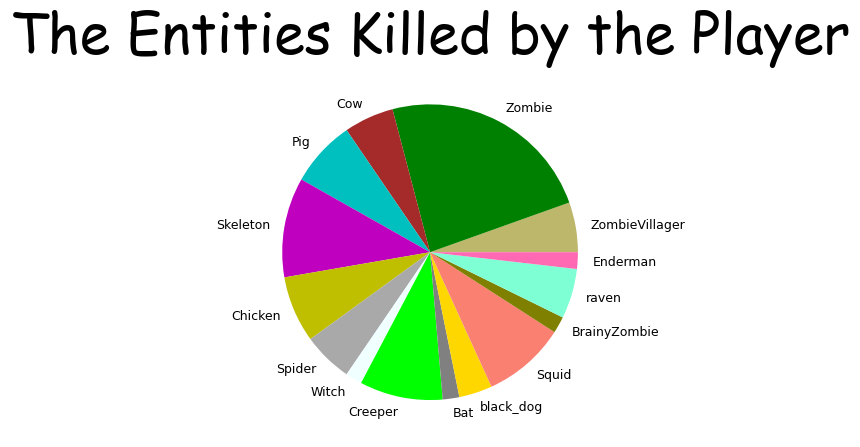

In [331]:
killEntityCols = [col for col in dataF.columns if col.startswith('stat.killEntity.')]
numberKilled = np.array(dataF[killEntityCols].iloc[-1].astype(int))
killEntityColsStripped = [i.removeprefix('stat.killEntity.') for i in killEntityCols]
killEntityColsStripped2 = [i.removeprefix('bewitchment.') for i in killEntityColsStripped]
kcolors =['darkkhaki', 'g', 'brown', 'c', 'm', 'y', 'darkgrey', 'azure', "lime",'grey', 'gold','salmon', 'olive', 'aquamarine', 'hotpink']
pieKillEntity=plt.pie(numberKilled,  labels = killEntityColsStripped2, colors = kcolors)
plt.title(label='The Entities Killed by the Player', fontsize =40, fontname='Comic Sans MS')
plt.show(pieKillEntity) 
##plt.rcParams['font.size'] = 9.0

# Line Graph

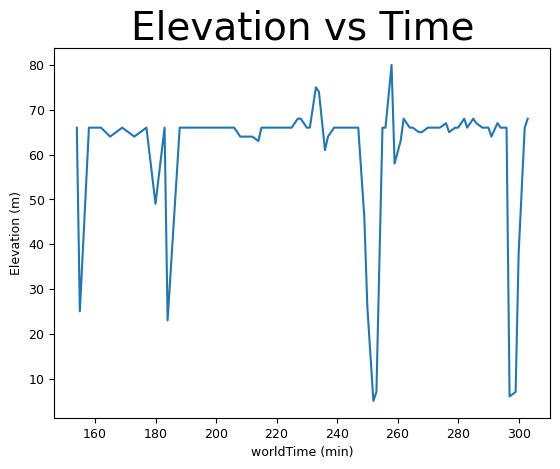

In [303]:
heightPlt=plt.plot(dataF["worldTimeMin"],dataF["playerPostionY"])
plt.title(label='Elevation vs Time', fontsize =28)
plt.xlabel("worldTime (min)")
plt.ylabel("Elevation (m)")
plt.show(heightPlt)
#0m is the bottom of the world, 255m is the top of the world

# Scatter Plot

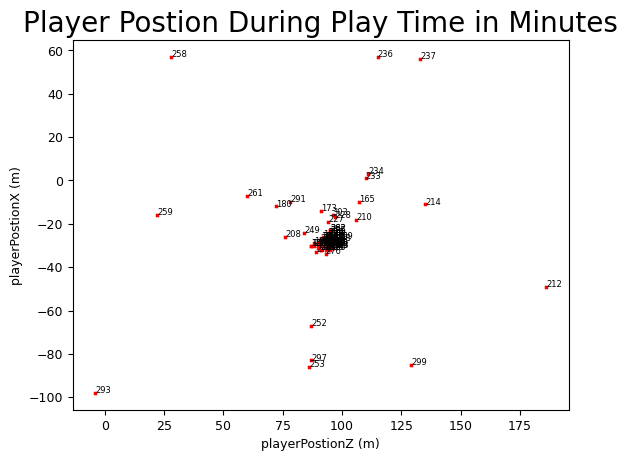

In [304]:
fig, zx = plt.subplots()
zx.scatter(dataF["playerPostionZ"],dataF["playerPostionX"], marker = 'x', s=4 ,c='red')

for i, txt in enumerate(dataF["worldTimeMin"]):
    zx.annotate(txt, (dataF["playerPostionZ"][i], dataF["playerPostionX"][i]),fontsize=6)

plt.title(label='Player Postion During Play Time in Minutes', fontsize =20)
plt.xlabel("playerPostionZ (m)")
plt.ylabel("playerPostionX (m)")    
plt.show()

# Diff Multi Line Graph

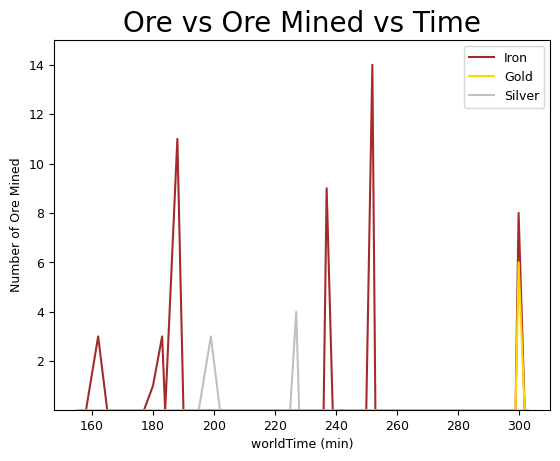

In [330]:
oreMined = plt.plot( dataF2["worldTimeMin"], dataF2["diff.mineBlock.minecraft.iron_ore"],c='brown', label = "Iron")
oreMined = plt.plot( dataF2["worldTimeMin"], dataF2["diff.mineBlock.minecraft.gold_ore"],c='gold', label = "Gold")
oreMined = plt.plot( dataF2["worldTimeMin"], dataF2['diff.mineBlock.bewitchment.silver_ore'],c='silver', label = "Silver")
plt.title("Ore vs Ore Mined vs Time", fontsize =20)
plt.ylim(.03, 15)
plt.ylabel("Number of Ore Mined")
plt.xlabel("worldTime (min)")
plt.legend()
plt.show(oreMined)

# Histgram

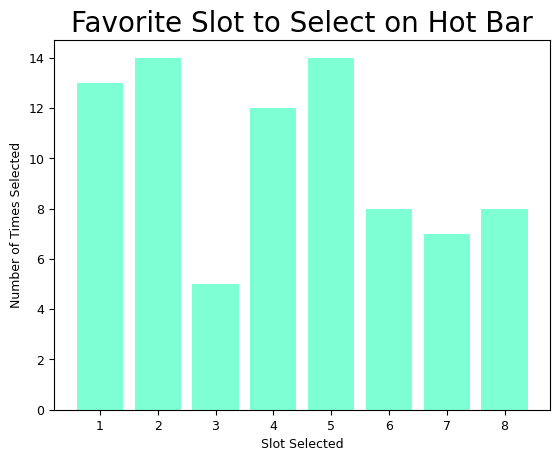

In [326]:
sList=list(dataF["playerSlotSelected"])
sList =[i+1 for i in sList]
soltHist=plt.hist(sList, bins = 8, rwidth=.8 ,density=False ,align='left',color = 'aquamarine' )
plt.title("Favorite Slot to Select on Hot Bar", fontsize =20)
plt.ylabel("Number of Times Selected")
plt.xlabel("Slot Selected")
plt.show(soltHist)